# Practice: Classification
Predict whether or not someone makes over $50K based on census data

In [1]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import platform
from scripts.helper_functions import describe_numeric_data
from scripts import about

In [2]:
print(about.__summary__)
print("Python: ",platform.python_version())

The 'scripts' package contains useful data exploration modules.
Python:  3.7.4


### Explore the data set

In [3]:
# show all cloumns
pd.set_option('display.max_columns', None)

In [4]:
url = "https://media.githubusercontent.com/media/PacktPublishing/Hands-On-Gradient-Boosting-with-XGBoost-and-Scikit-learn/master/Chapter02/census_cleaned.csv"

In [5]:
df_census = pd.read_csv(url)
df_census.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native-country_ ?,native-country_ Cambodia,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
describe_numeric_data(df_census)

data : 93 rows x 10 columns


,count,mean,std,min,25%,50%,75%,max,dtypes,NULLs
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0,int64,0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0,int64,0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0,int64,0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0,int64,0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0,int64,0
...,...,...,...,...,...,...,...,...,...,...
native-country_ Trinadad&Tobago,32561.0,0.000584,0.024149,0.0,0.0,0.0,0.0,1.0,int64,0
native-country_ United-States,32561.0,0.895857,0.305451,0.0,1.0,1.0,1.0,1.0,int64,0
native-country_ Vietnam,32561.0,0.002058,0.045316,0.0,0.0,0.0,0.0,1.0,int64,0
native-country_ Yugoslavia,32561.0,0.000491,0.022162,0.0,0.0,0.0,0.0,1.0,int64,0


### Split Data

In [7]:
# split into predictor 'X' and response 'y'
X = df_census.iloc[:,:-1]
y = df_census.iloc[:,-1]

In [8]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income_ >50K, dtype: int64

#### Compare Accuracy
Compare out-of-the-box accuracy of Scikit-learn's `DecisionTreeClassifier` against XGBoost's `XGBClassifier`. The `XGBClassifier` is expected to perform better due to XGBoost's architecture that was design for computational speed and model performance and is dominant machine learning tool in Kaggle competitions.  

In [9]:
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from scripts.models import ClassifierModel
# import warnings

In [10]:
# silence warnings
# warnings.filterwarnings('ignore')

Decision Tree Accuracy

In [11]:
dt_clf = ClassifierModel(X, y, DecisionTreeClassifier)
dt_clf.print_accuracy_score()

Completed in 0.36 seconds
Accuracy of DecisionTreeClassifier:  81.32%


XGBoost Accuracy

In [12]:
xgb.sklearn.warnings.filterwarnings('ignore')

In [13]:
xgb_clf = ClassifierModel(X, y, xgb.XGBClassifier)
xgb_clf.print_accuracy_score()

[13:16:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Completed in 3.94 seconds
Accuracy of XGBClassifier:  86.56%


### Tuning Hyperparamters for Estimators
How much can we improve the Scikit-learn classifier model's performance?

In [14]:
from skopt import BayesSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

from skopt.space import Real, Integer
from skopt.utils import use_named_args

Set hyperparamters

In [15]:
n_features = X.shape[1]

Set parameter distributions.

In [16]:
"""set parameter distribution for the
GridSearCV algorithm.""" 
params_grid = {
    'max_depth': [None,2,3,4,6,8,10,12,15,20],
    'max_features': ['auto'],
    'min_samples_split': [2,3,5,10,20,40,60,90,100],
    'min_samples_leaf': [1,2,4,6,8,10,20,30],
}

"""set parameter distribution for the
RandomizedSearchCV algorithm.""" 
params_rand = {
    'max_depth': [None,2,3,4,6,8,10,12,15,20],
    'max_features': ['auto'],
    'min_samples_split': [2,3,5,10,20,40,60,90,100],
    'min_samples_leaf': [1,2,4,6,8,10,20,30],
}

"""set parameter distribution for the
BayesSearchCV algorithm. Note the parameters 
are set to the same as the first two algorithms."""
params_bayes  = {
    'max_depth': Integer(1, 20,),
    'max_features': Integer(1, n_features,),
    'min_samples_split': Integer(2, 100,),
    'min_samples_leaf': Integer(1, 30,),
}

"""set parameter distribution for the
BayesSearchCV that is appropriate for this algorithm."""
params_xgb_bayes  = {
    'eta': Real(0.001, 1, "log-uniform",),
    'max_depth': Integer(3, 10,),
    'subsample': Real(0.5, 1.0,),
    'colsample_bytree': Real(0.5, 1.0,),
    'colsample_bylevel': Real(0.5, 1.0,),
}

print("Parameter distributions set.")

Parameter distributions set.


Set up the paramater search algorithms

In [17]:
clf_grid = GridSearchCV(
    estimator = DecisionTreeClassifier(),
    param_grid = params_grid,
    scoring = 'accuracy',
    cv = 5,
)

In [18]:
clf_rand = RandomizedSearchCV(
    estimator = DecisionTreeClassifier(),
    param_distributions = params_rand,
    scoring = 'accuracy',
    random_state = 2,
    cv = 5,
)

In [19]:
clf_bayes = BayesSearchCV(
    estimator = DecisionTreeClassifier(),
    search_spaces = params_bayes,
    scoring = 'accuracy',
    random_state = 2,
    cv = 5,
)

Run models and compare performance

In [20]:
model_grid = ClassifierModel(X, y, clf_grid)
tuple_grid_metric = model_grid.print_cross_val_score()

Completed in 3 minutes
Cross_Val Accuracy:  84.68%
Best Paramters:
{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 6, 'min_samples_split': 60}


In [21]:
model_rand = ClassifierModel(X, y, clf_rand)
tuple_rand_metric = model_rand.print_cross_val_score()

Completed in 2.83 seconds
Cross_Val Accuracy:  84.51%
Best Paramters:
{'min_samples_split': 3, 'min_samples_leaf': 8, 'max_features': 'auto', 'max_depth': None}


In [22]:
model_bayes = ClassifierModel(X, y, clf_bayes)
tuple_bayes_metric = model_bayes.print_cross_val_score()

Completed in 2 minutes
Cross_Val Accuracy:  85.70%
Best Paramters:
OrderedDict([('max_depth', 20), ('max_features', 71), ('min_samples_leaf', 30), ('min_samples_split', 100)])


Best Scores

In [23]:
grid_score = clf_grid.best_score_
rand_score = clf_rand.best_score_
bayes_score = clf_bayes.best_score_

print(f"Best Scores:\nGrid {grid_score:0.2%}\nRandom {rand_score:0.2%}\nBayes {bayes_score:0.2%}")

Best Scores:
Grid 84.68%
Random 84.51%
Bayes 85.70%


Collect sores and durations

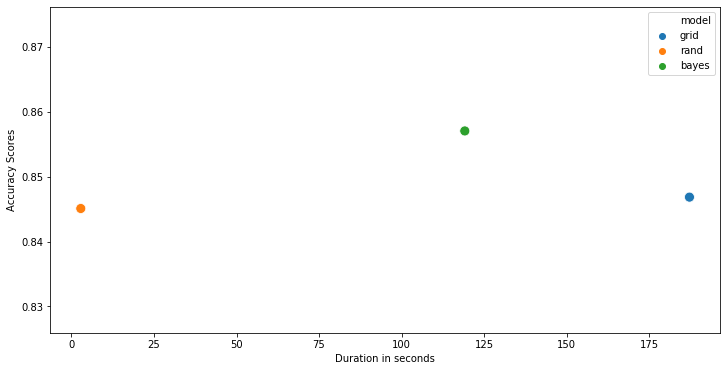

In [25]:
list_names = ['grid','rand','bayes']
list_metric_tuples = [tuple_grid_metric,tuple_rand_metric, tuple_bayes_metric]
list_best_scores = [score.best_score for score in list_metric_tuples]
list_of_duration = [score.duration for score in list_metric_tuples]

dict_metric = {
     'scores': list_best_scores,
     'duration': list_of_duration,
     'model': list_names,
 }

# create dataframe with durations and scores
df_metric = pd.DataFrame(dict_metric)

# plot values
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
ax = sns.scatterplot(x='duration', y='scores', hue="model", s=100, data=df_metric,)
ax.set(xlabel='Duration in seconds', ylabel='Accuracy Scores')
plt.show();

Test the `BayesSearchCV` on an XGBoost estimator.

In [26]:
clf_xgb_bayes = BayesSearchCV(
    estimator = xgb.XGBClassifier(verbosity=0),
    search_spaces = params_bayes,
    scoring = 'accuracy',
    random_state = 2,
    cv = 5,
)

model_xgb_bayes = ClassifierModel(X, y, clf_xgb_bayes)
model_xgb_bayes.print_cross_val_score()

Completed in 27 minutes
Cross_Val Accuracy:  87.25%
Best Paramters:
OrderedDict([('max_depth', 5), ('max_features', 11), ('min_samples_leaf', 29), ('min_samples_split', 95)])


Metric(best_score=0.8725162003623967, duration=1609.2777061462402)

Using a parameter that's tailored to the XGBoost library.

In [27]:
clf_xgb_bayes = BayesSearchCV(
    estimator = xgb.XGBClassifier(verbosity=0),
    search_spaces = params_xgb_bayes,
    scoring = 'accuracy',
    random_state = 2,
    cv = 5,
)

model_xgb_bayes = ClassifierModel(X, y, clf_xgb_bayes)
model_xgb_bayes.print_cross_val_score()

Completed in 15 minutes
Cross_Val Accuracy:  87.46%
Best Paramters:
OrderedDict([('colsample_bylevel', 1.0), ('colsample_bytree', 0.5), ('eta', 0.18582090119998787), ('max_depth', 5), ('subsample', 1.0)])


Metric(best_score=0.8746045883111698, duration=929.0207009315491)